In [24]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date

import file

In [25]:
# Define the ticker symbol
symbols = ['SPY','QQQ']

history = {}

for symbol in symbols:
    tickerData = yf.Ticker(symbol)
    history[symbol] = tickerData.history(interval='1wk', start='2020-1-1', end=date.today())


In [26]:
option_leverage = {
    'SPY': {
        1: 591/2.27,
        2: 591/2.99,
        3: 591/3.79,
        4: 591/4.60
    },
    'QQQ': {
        1: 519/2.17,
        2: 519/2.91,
        3: 519/3.82,
        4: 519/4.62
    },
}

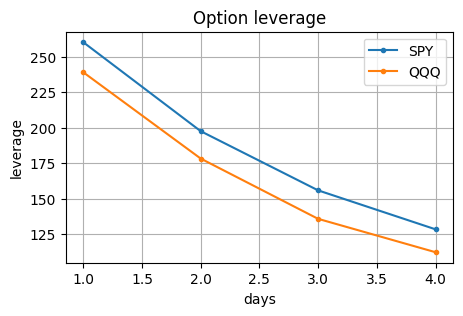

In [27]:
plt.figure(figsize=(5,3))
for symbol, lvr in option_leverage.items():
  plt.plot(*zip(*sorted(lvr.items())), label=symbol, marker='.')
plt.title('Option leverage')
plt.legend()
plt.xlabel('days')
plt.ylabel('leverage')
plt.grid()

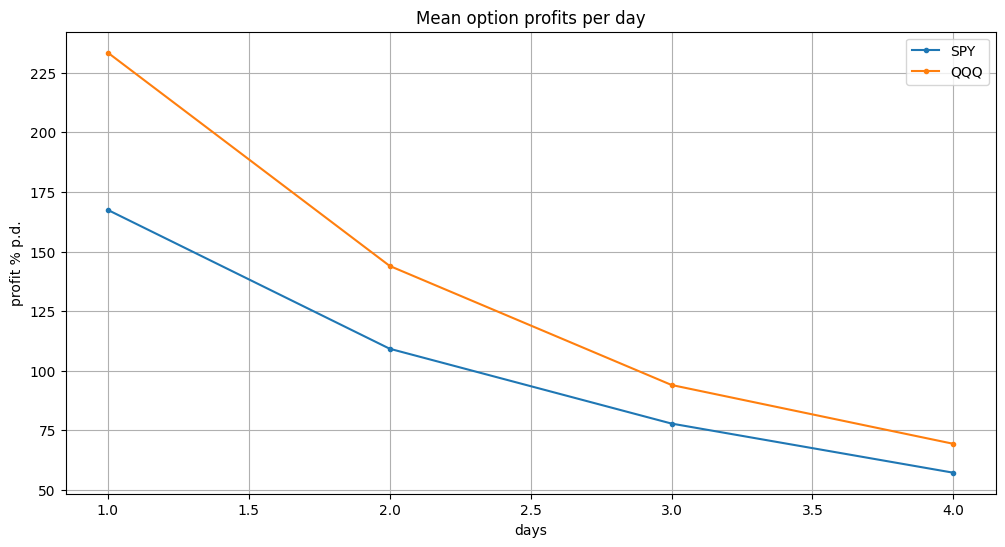

In [28]:
plt.figure(figsize=(12,6))

for symbol in symbols:
    profits = [None]
    for days, lvr in option_leverage[symbol].items():
        stock_changes = history[symbol]['Close'].pct_change(periods=days) * 100
        option_profits = (stock_changes[days:] * lvr - 100).clip(lower=-100)
        profits.append(option_profits.mean()/days)

    plt.plot(profits, label=symbol, marker='.')

plt.title('Mean option profits per day')
plt.legend()
plt.xlabel('days')
plt.ylabel('profit % p.d.')
plt.grid()

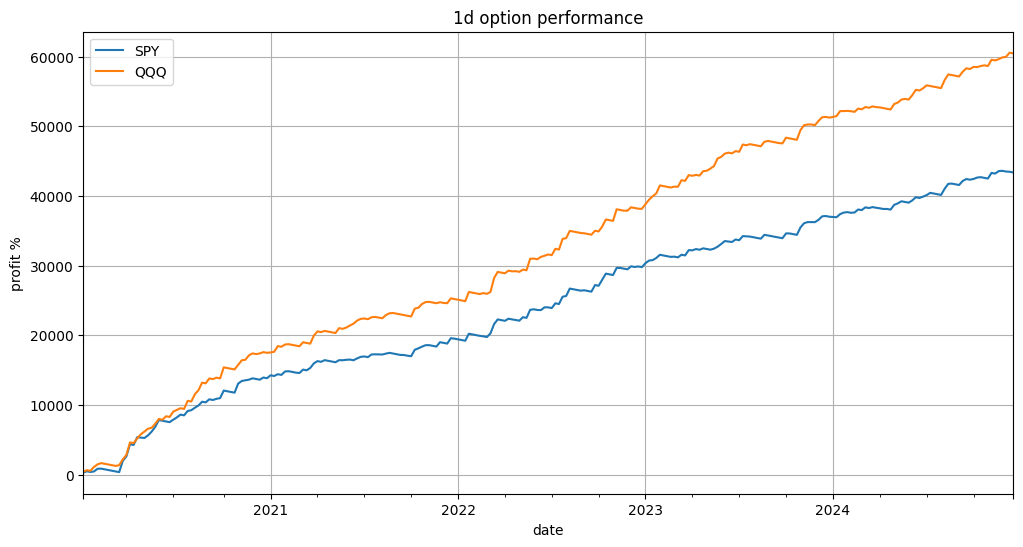

In [41]:
plt.figure(figsize=(12,6))

days = 1
for symbol in symbols:
    lvr = option_leverage[symbol][days]
    stock_changes = history[symbol]['Close'].pct_change(periods=days) * 100
    option_profits = (stock_changes[days:] * lvr - 100).clip(lower=-100)
    option_profits.cumsum().plot(label=symbol)

plt.title(f'{days}d option performance')
plt.legend()
plt.xlabel('date')
plt.ylabel('profit %')
plt.grid()

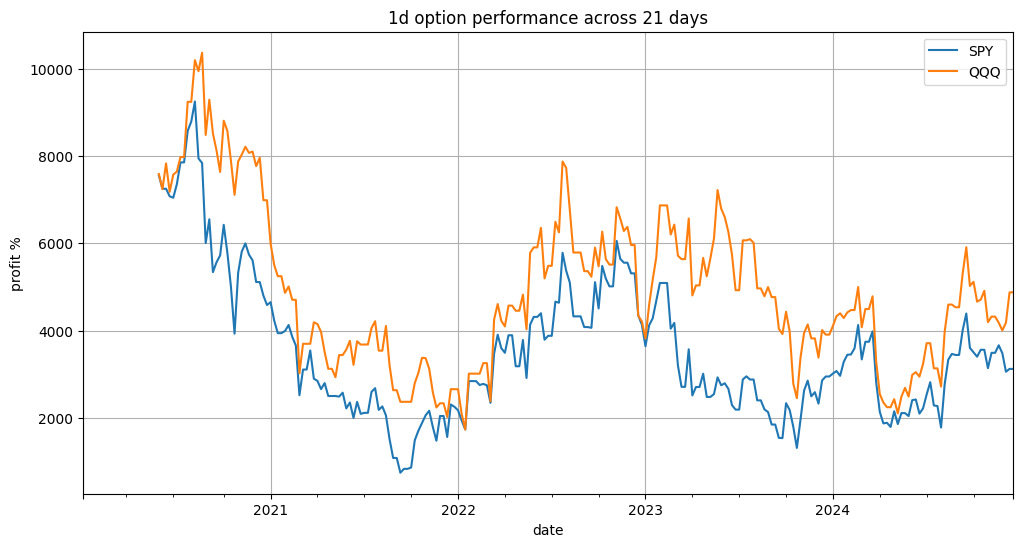

In [39]:
plt.figure(figsize=(12,6))

days = 1
span = 21
for symbol in symbols:
    lvr = option_leverage[symbol][days]
    stock_changes = history[symbol]['Close'].pct_change(periods=days) * 100
    option_profits = (stock_changes[days:] * lvr - 100).clip(lower=-100)
    option_profits.cumsum().diff(periods=span).plot(label=symbol)

plt.title(f'{days}d option performance across {span} days')
plt.legend()
plt.xlabel('date')
plt.ylabel('profit %')
plt.grid()